In [43]:
import os
import pandas
import numpy
import math
import matplotlib.pyplot as plt

#### **Movimentações de cargas no Porto de Imbituba**

In [44]:
time = numpy.arange(numpy.datetime64('2010-01-01'),numpy.datetime64('2024-01-01'),numpy.timedelta64(1,'h'))
datetime = pandas.DataFrame(time)
datetime = datetime.rename(columns={0:'Data'})
datetime

,Data
0,2010-01-01 00:00:00
1,2010-01-01 01:00:00
2,2010-01-01 02:00:00
3,2010-01-01 03:00:00
4,2010-01-01 04:00:00
...,...
122707,2023-12-31 19:00:00
122708,2023-12-31 20:00:00
122709,2023-12-31 21:00:00
122710,2023-12-31 22:00:00


In [45]:
array = numpy.random.uniform(50,1200,len(datetime))
array = numpy.around(array,0)
array

array([1144., 1142.,  317., ..., 1070.,  951.,  855.])

In [46]:
datetime['Cargas'] = array
datetime

,Data,Cargas
0,2010-01-01 00:00:00,1144.0
1,2010-01-01 01:00:00,1142.0
2,2010-01-01 02:00:00,317.0
3,2010-01-01 03:00:00,686.0
4,2010-01-01 04:00:00,867.0
...,...,...
122707,2023-12-31 19:00:00,502.0
122708,2023-12-31 20:00:00,69.0
122709,2023-12-31 21:00:00,1070.0
122710,2023-12-31 22:00:00,951.0


##### **Análise descritiva**

In [58]:
from collections import Counter
print(f'Valor mínimo: {datetime.Cargas.min() :.0f} cargas transportadas')
print(f'Primeiro quartil: {datetime.Cargas.quantile(0.25) :.0f} cargas transportadas')
print(f'Segundo quartil: {datetime.Cargas.quantile(0.50) :.0f} cargas transportadas')
print(f'Terceiro quartil: {datetime.Cargas.quantile(0.75) :.0f} cargas transportadas')
print(f'Valor máximo: {datetime.Cargas.max() :.0f} cargas transportadas')
print(f'Valor médio: {datetime.Cargas.mean() :.0f} cargas transportadas \n')

Valor mínimo: 50 cargas transportadas
Primeiro quartil: 339 cargas transportadas
Segundo quartil: 627 cargas transportadas
Terceiro quartil: 914 cargas transportadas
Valor máximo: 1200 cargas transportadas
Valor médio: 626 cargas transportadas 



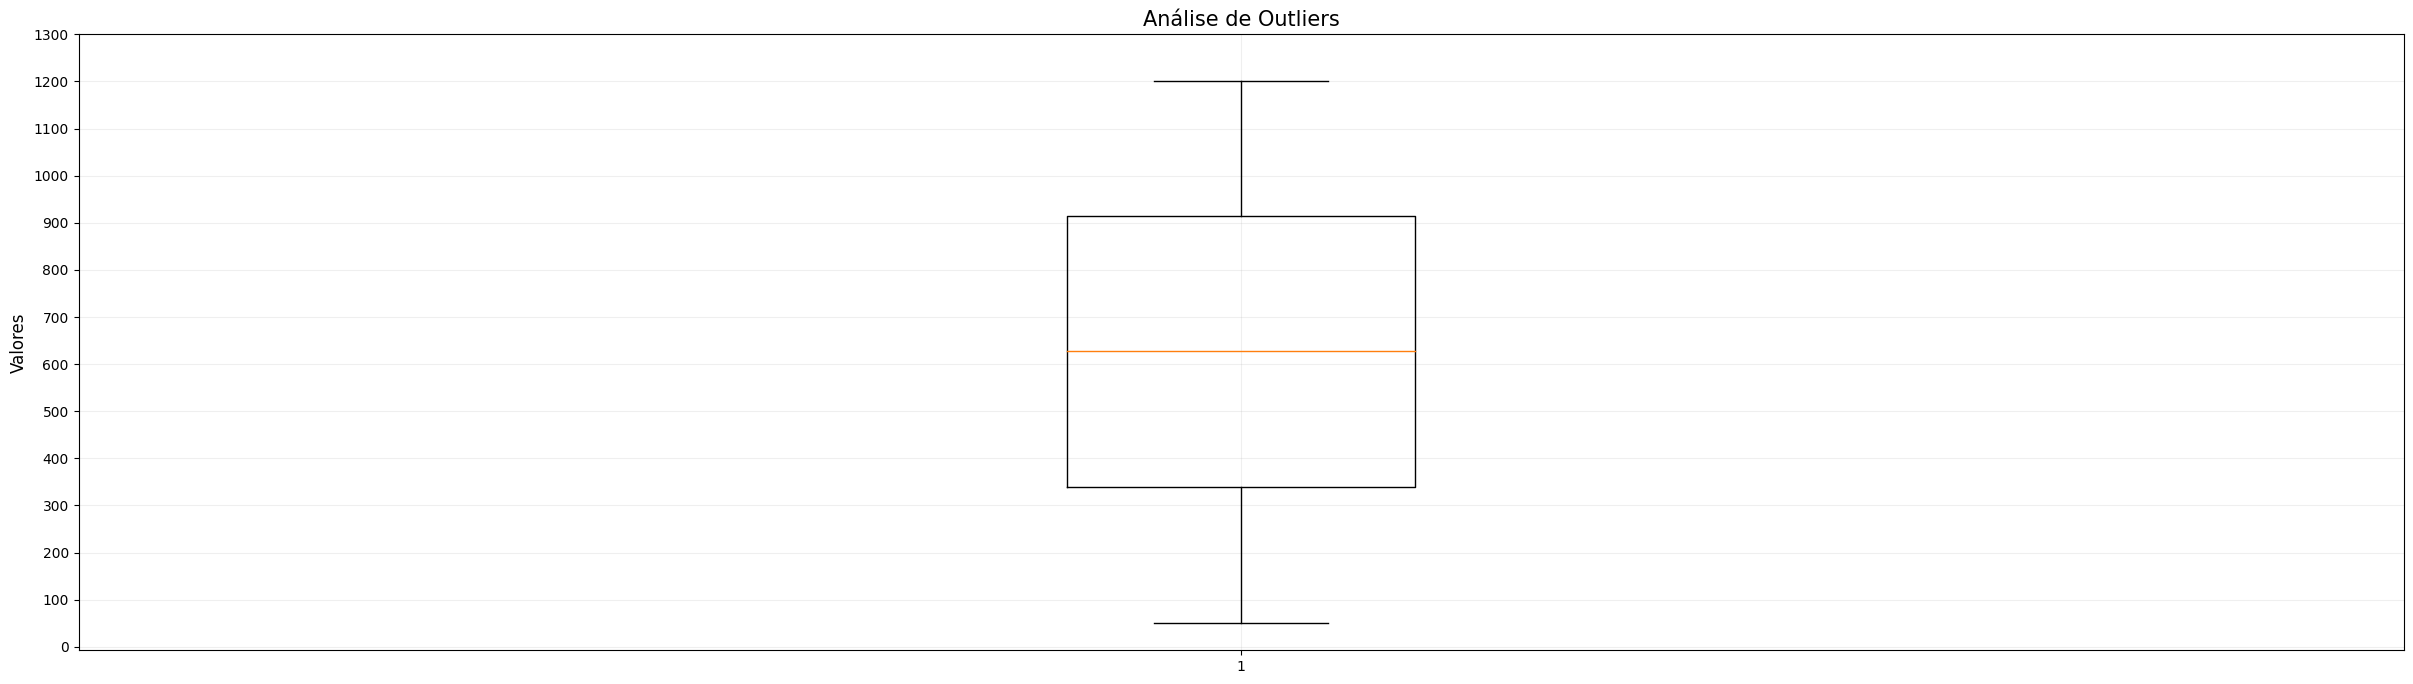

In [63]:
plt.figure(figsize=(30,8))
plt.boxplot(datetime.Cargas)
plt.yticks(range(0,1400,100))
plt.title('Análise de Outliers',fontsize=15)
plt.ylabel('Valores',fontsize=12)
plt.grid(alpha=0.2)
plt.show()

##### **Movimentação Mensal Média**

In [49]:
timeseries_monthly = datetime.resample(rule='M', on='Data')['Cargas'].mean()
timeseries_monthly = timeseries_monthly.sort_index()
print(f'Quantidade de valores missing: {timeseries_monthly.isnull().sum()}')
timeseries_monthly = pandas.DataFrame(timeseries_monthly)
timeseries_monthly

Quantidade de valores missing: 0


,Cargas
Data,
2010-01-31,615.987903
2010-02-28,637.187500
2010-03-31,612.900538
2010-04-30,643.041667
2010-05-31,631.219086
...,...
2023-08-31,622.459677
2023-09-30,619.525000
2023-10-31,641.106183


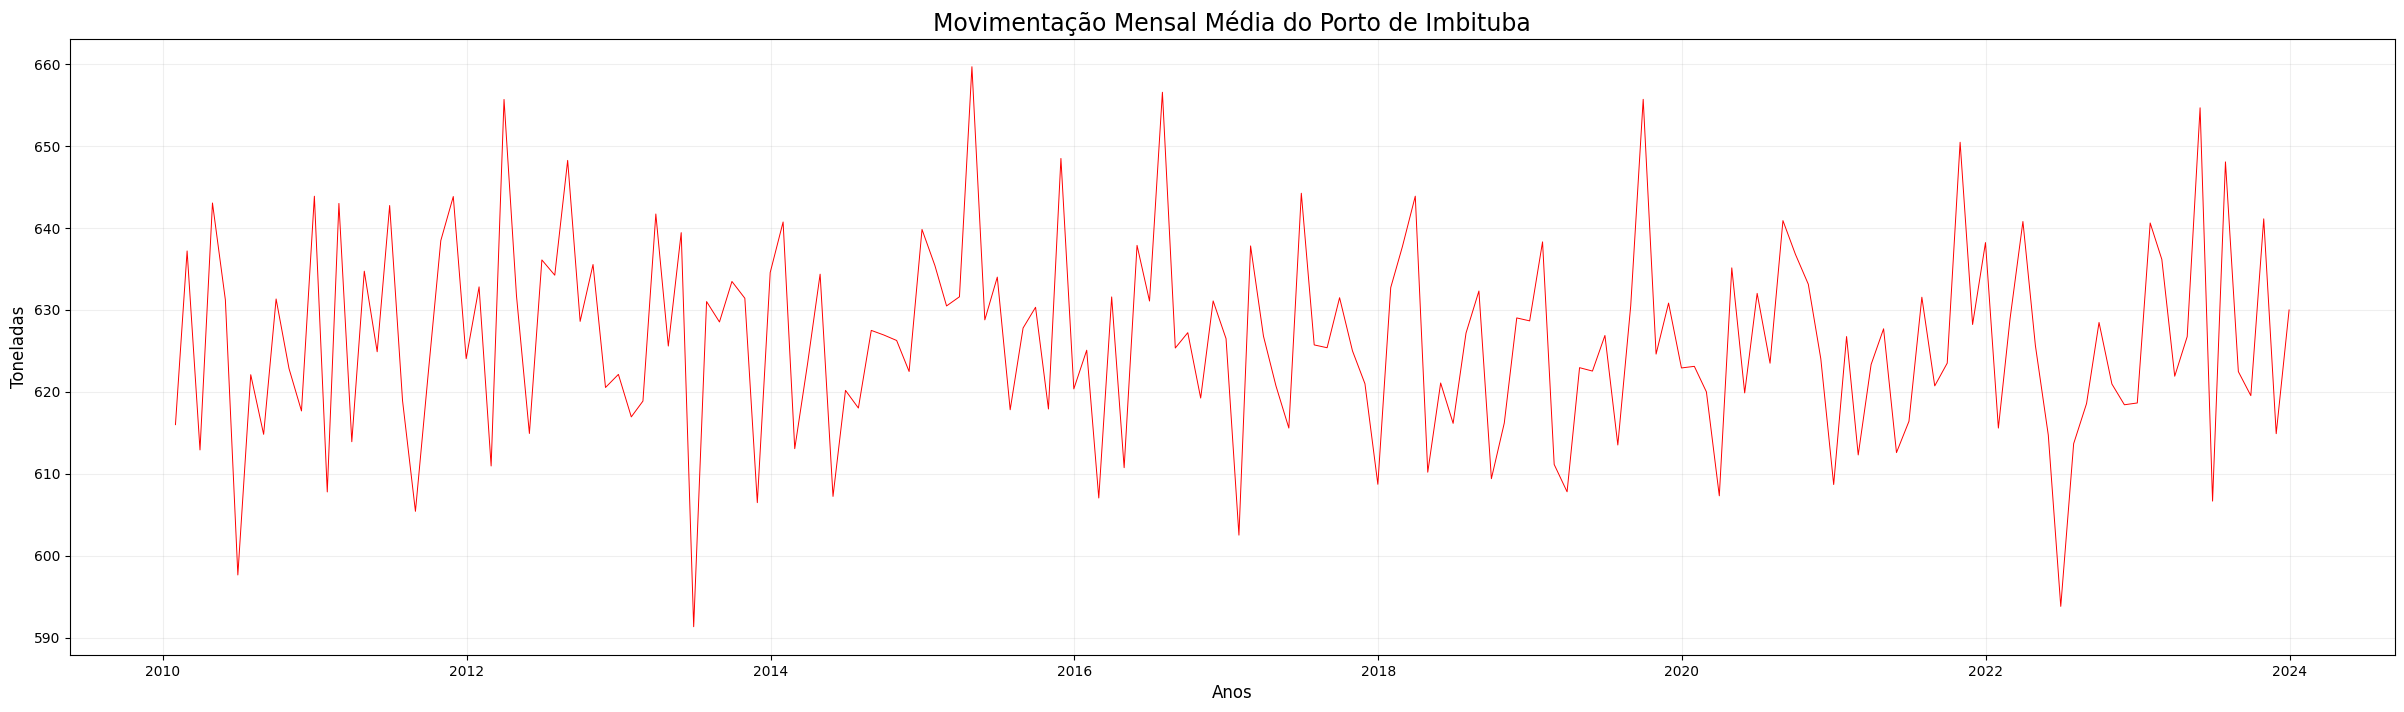

In [50]:
plt.figure(figsize=(30,8))
plt.plot(timeseries_monthly.index,timeseries_monthly.Cargas,color='red',alpha=1,linewidth=0.7)
plt.title('Movimentação Mensal Média do Porto de Imbituba', fontsize=17)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Toneladas', fontsize=12)
plt.grid(alpha=0.2)
plt.show()

ShapiroResult(statistic=0.9942083632062813, pvalue=0.7510699338643447)
(0.04213190439581338, 0.7215146410876779)


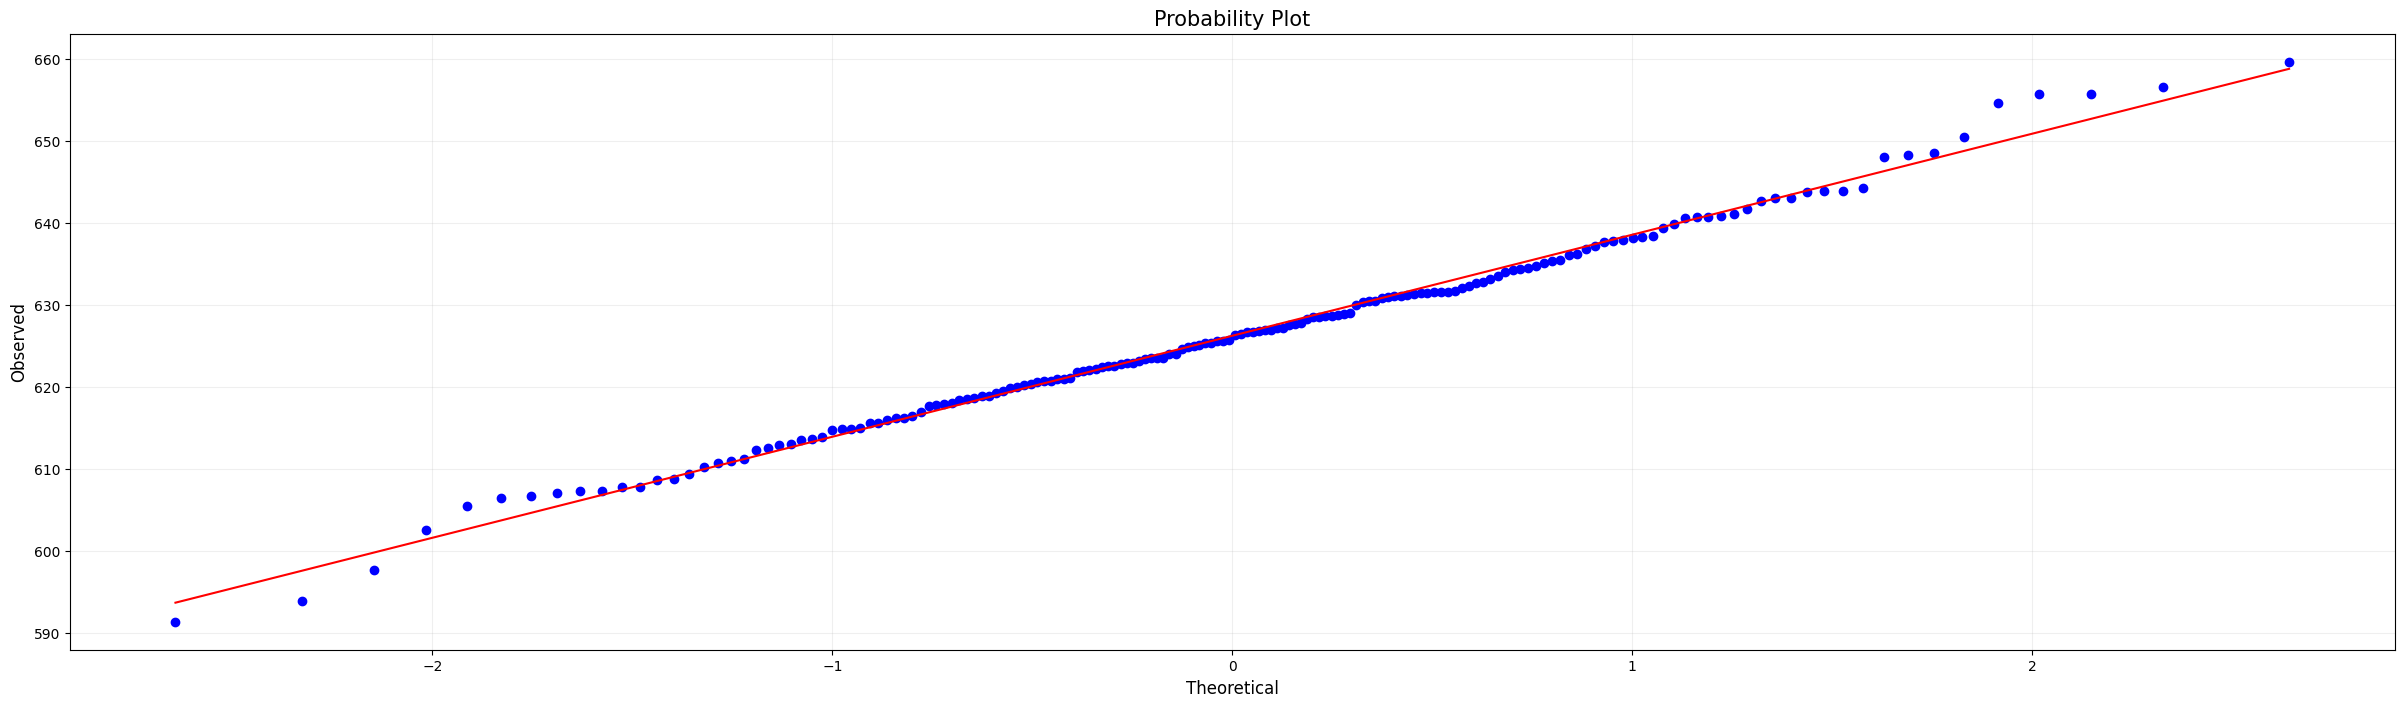

In [51]:
import scipy.stats
from statsmodels.stats.diagnostic import lilliefors
print(scipy.stats.shapiro(timeseries_monthly.Cargas))
print(lilliefors(timeseries_monthly.Cargas))
plt.figure(figsize=(30,8))
scipy.stats.probplot(timeseries_monthly.Cargas, dist='norm',plot=plt)
plt.title(f'Probability Plot', fontsize=15)
plt.xlabel('Theoretical', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.grid(alpha=0.2)
plt.show()

##### **Movimentação Anual Média**

In [68]:
timeseries_anual= datetime.resample(rule='Y', on='Data')['Cargas'].mean()
timeseries_anual = timeseries_anual.sort_index()
print(f'Quantidade de valores missing: {timeseries_anual.isnull().sum()}')
timeseries_anual = pandas.DataFrame(timeseries_anual)
timeseries_anual = timeseries_anual.reset_index()
timeseries_anual

Quantidade de valores missing: 0


,Data,Cargas
0,2010-12-31,624.125799
1,2011-12-31,626.386758
2,2012-12-31,631.073884
3,2013-12-31,625.104909
4,2014-12-31,625.087443
5,2015-12-31,631.766438
6,2016-12-31,627.577527
7,2017-12-31,623.561644
8,2018-12-31,625.365753
9,2019-12-31,625.656963


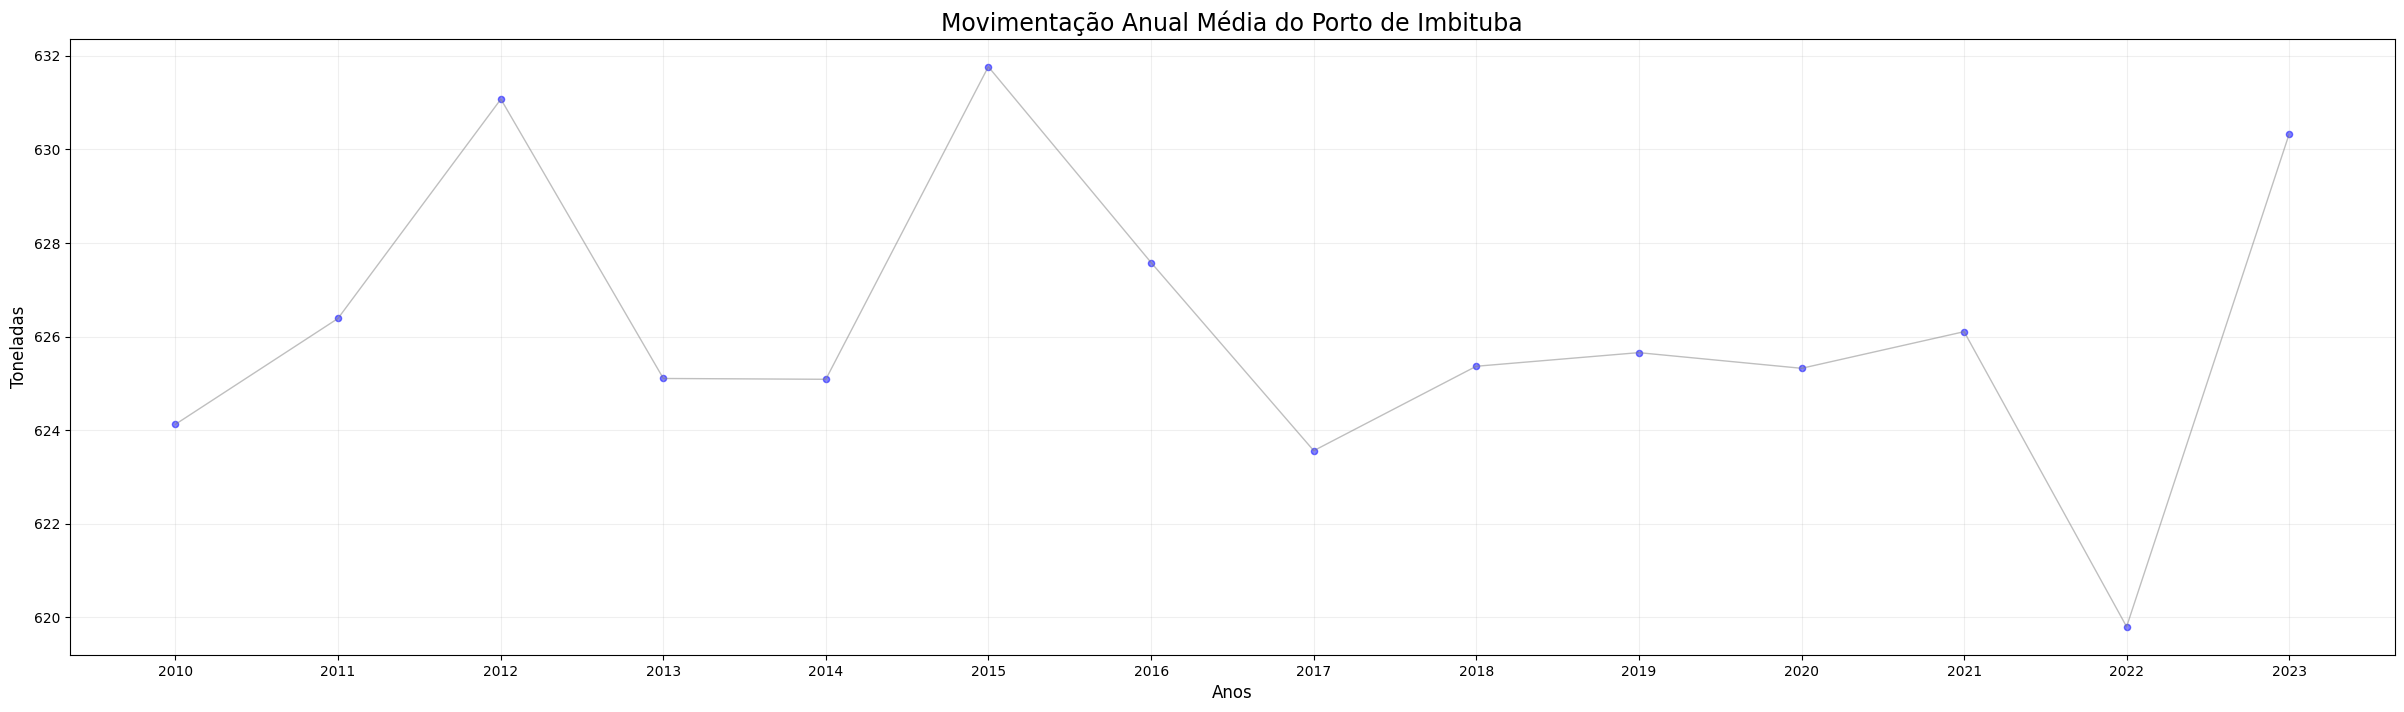

In [70]:
plt.figure(figsize=(30,8))
plt.scatter(timeseries_anual.Data,timeseries_anual.Cargas,color='blue',alpha=0.5,s=20)
plt.plot(timeseries_anual.Data,timeseries_anual.Cargas,color='gray',alpha=0.5,linewidth=1)
plt.title('Movimentação Anual Média do Porto de Imbituba', fontsize=17)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Toneladas', fontsize=12)
plt.xticks(timeseries_anual.Data,timeseries_anual.Data.dt.year)
plt.grid(alpha=0.2)
plt.show()

ShapiroResult(statistic=0.925177410153136, pvalue=0.26081761961953515)
(0.19486498216224302, 0.1677727213659982)


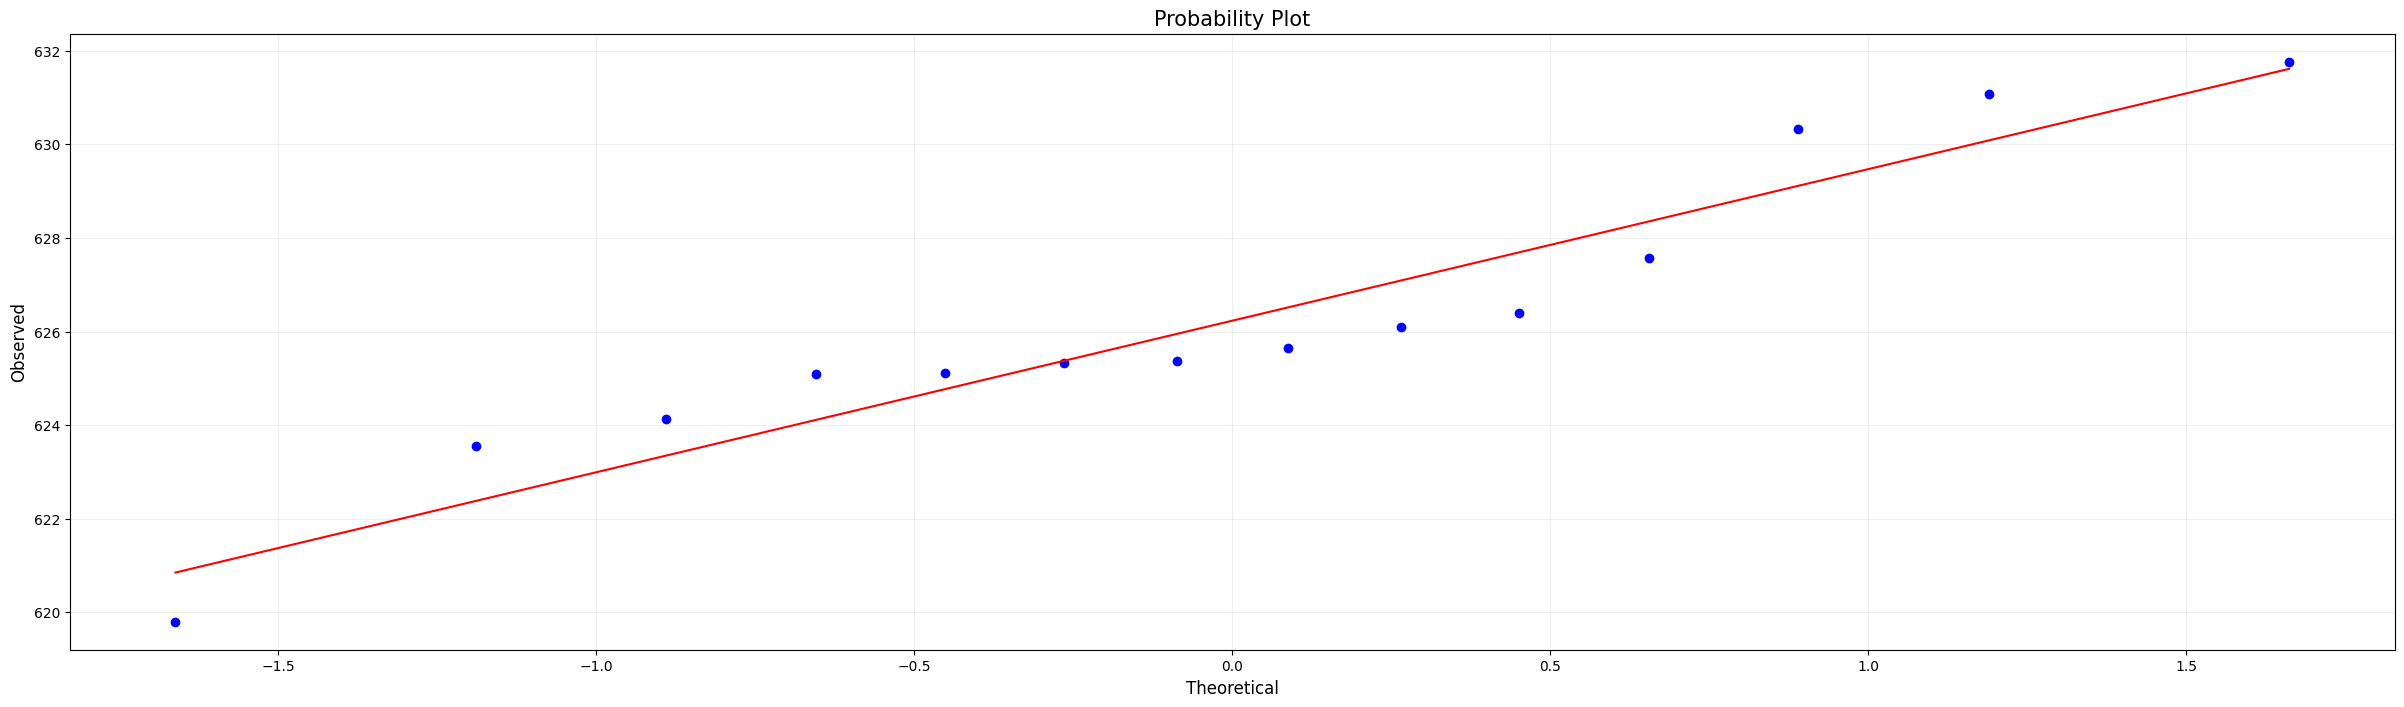

In [71]:
import scipy.stats
print(scipy.stats.shapiro(timeseries_anual.Cargas))
print(lilliefors(timeseries_anual.Cargas))
plt.figure(figsize=(30,8))
scipy.stats.probplot(timeseries_anual.Cargas, dist='norm',plot=plt)
plt.title(f'Probability Plot', fontsize=15)
plt.xlabel('Theoretical', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.grid(alpha=0.2)
plt.show()